# Wine Quality Prediction

### Justify how the problem fits to the data science application.

The wine quality dataset is an excellent fit for data science application because it involves a wide range of input variables that can be used to predict the quality of wine, which is of significant importance to wine producers, distributors, and consumers. Data analysis can help determine the critical factors affecting wine quality, which can be used to improve the winemaking process.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Wine_Quality_Dataset.csv')

## Pre-processing

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Exploratory Data Analysis

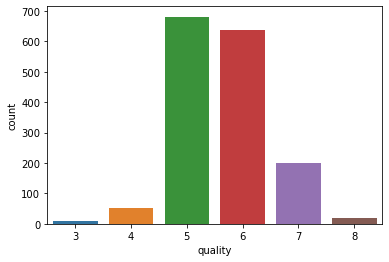

In [7]:
sns.countplot(x='quality',data=df)
plt.show()

<AxesSubplot:title={'center':'Quality vs pH'}, xlabel='quality', ylabel='pH'>

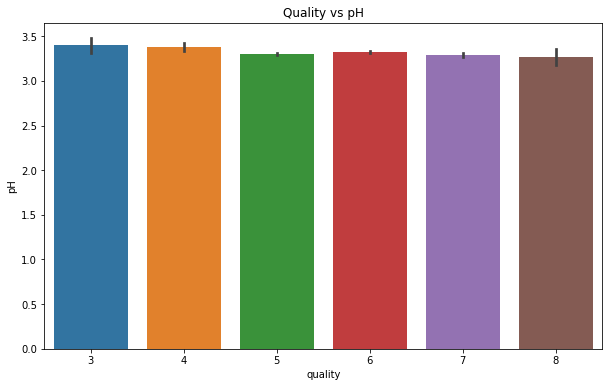

In [8]:
plt.figure(figsize=(10,6))  #for setting the plot size
plt.title('Quality vs pH')  #add title
sns.barplot(x='quality',y='pH',data=df)

<AxesSubplot:title={'center':'Quality vs Volatile acidity'}, xlabel='quality', ylabel='volatile acidity'>

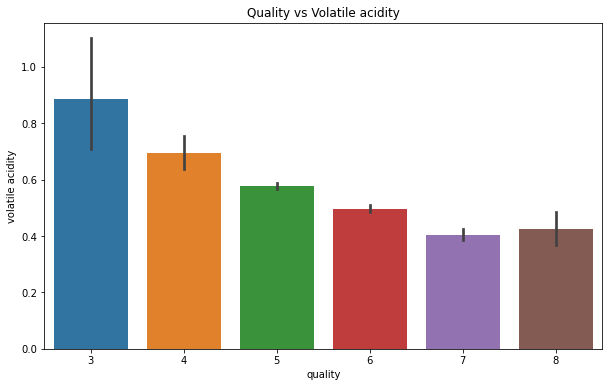

In [9]:
plt.figure(figsize=(10,6))
plt.title('Quality vs Volatile acidity')
sns.barplot(x='quality',y='volatile acidity',data=df)

Composition of volatile acidity go lower as we go higher in the quality of the wine

<AxesSubplot:title={'center':'Quality vs Citric acid'}, xlabel='quality', ylabel='citric acid'>

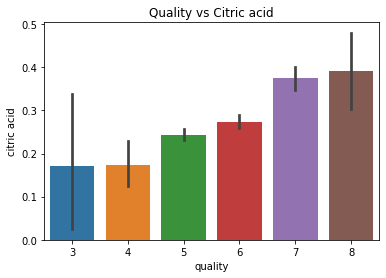

In [10]:
plt.title('Quality vs Citric acid')
sns.barplot(x='quality',y='citric acid',data=df)

Composition of citric acid go higher as we go higher in the quality of the wine

<AxesSubplot:title={'center':'Quality vs Residual sugar'}, xlabel='quality', ylabel='residual sugar'>

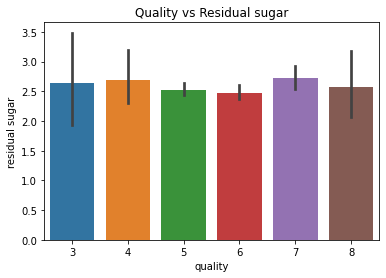

In [11]:
plt.title('Quality vs Residual sugar')
sns.barplot(x='quality',y='residual sugar',data=df)

<AxesSubplot:title={'center':'Quality vs Free sulfur dioxide'}, xlabel='quality', ylabel='free sulfur dioxide'>

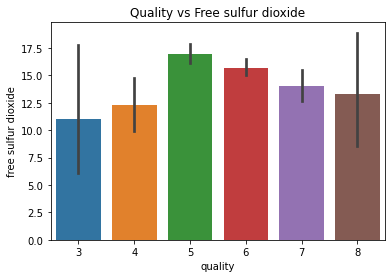

In [12]:
plt.title('Quality vs Free sulfur dioxide')
sns.barplot(x='quality',y='free sulfur dioxide',data=df)

<AxesSubplot:title={'center':'Quality vs Total sulfur dioxide'}, xlabel='quality', ylabel='total sulfur dioxide'>

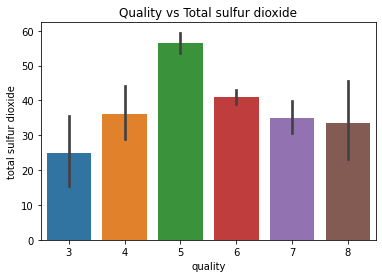

In [13]:
plt.title('Quality vs Total sulfur dioxide')
sns.barplot(x='quality',y='total sulfur dioxide',data=df)

<AxesSubplot:title={'center':'Quality vs Density'}, xlabel='quality', ylabel='density'>

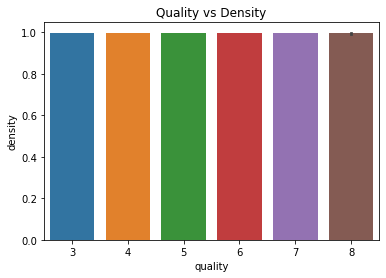

In [14]:
plt.title('Quality vs Density')
sns.barplot(x='quality',y='density',data=df)

<AxesSubplot:title={'center':'Quality vs Sulphates'}, xlabel='quality', ylabel='sulphates'>

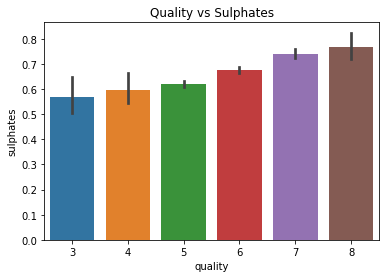

In [15]:
plt.title('Quality vs Sulphates')
sns.barplot(x='quality',y='sulphates',data=df)

<AxesSubplot:title={'center':'Quality vs Alcohol'}, xlabel='quality', ylabel='alcohol'>

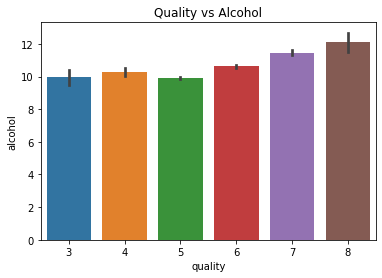

In [16]:
plt.title('Quality vs Alcohol')
sns.barplot(x='quality',y='alcohol',data=df)

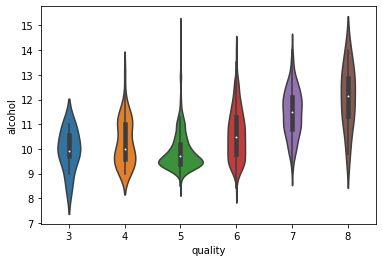

In [17]:
sns.violinplot(x='quality', y='alcohol', data=df)
plt.show()

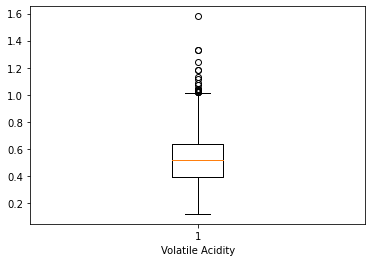

In [18]:
# create a box plot of the "volatile acidity" variable
plt.boxplot(df['volatile acidity'])
plt.xlabel('Volatile Acidity')
plt.show()

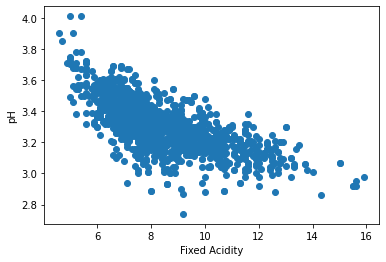

In [19]:
# create a scatter plot of "fixed acidity" vs. "pH"
plt.scatter(df['fixed acidity'], df['pH'])
plt.xlabel('Fixed Acidity')
plt.ylabel('pH')
plt.show()

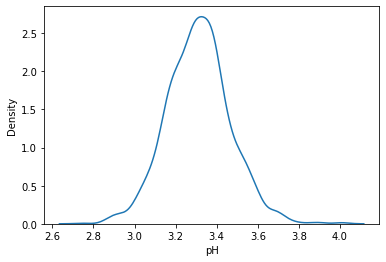

In [20]:
sns.kdeplot(df['pH'])
plt.show()

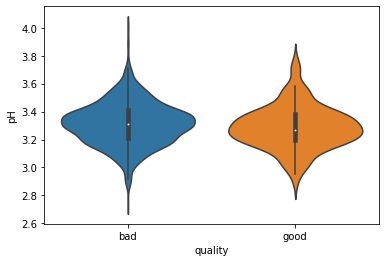

In [53]:
sns.violinplot(x='quality', y='pH', data=df)
plt.show()

In [22]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

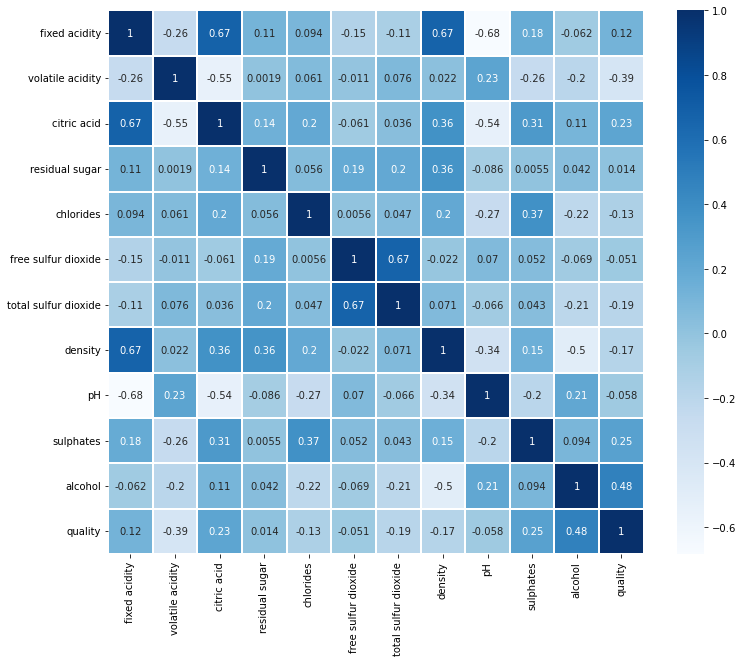

In [23]:
plt.figure(figsize=(12,10))  #to set the plot size
sns.heatmap(df.corr(),annot=True,linewidth=0.4,cmap='Blues')  

➡️ Highly correlated features:

    1.fixed acidity and citric acid 

    2.free sulphur dioxide and total sulphor dioxide

    3.fixed acidity and density

➡️ Weakily correlated features:

    1.citric acid and volatile acidity

    2.fixed acidity and pH

    3.density and alcohol


From above points there is a clear inference that alcohol is the most important characteristic to determine the quality of wine.

## Feature Selection

In [24]:
bins=(2,6.5,8)
labels=['bad','good']
df['quality']=pd.cut(x=df['quality'],bins=bins,labels=labels)

In [25]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [26]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [27]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
k_best = SelectKBest(f_classif, k=4)
X_new = k_best.fit_transform(X, y)
mask = k_best.get_support() 
top_features = X.columns[mask]
print(top_features)

Index(['volatile acidity', 'citric acid', 'sulphates', 'alcohol'], dtype='object')


## Feature Generation

In [28]:
df['total_sulfur'] = df['free sulfur dioxide'] + df['total sulfur dioxide']

In [29]:
df['alcohol_bins'] = pd.cut(df['alcohol'], bins=3, labels=['Low', 'Medium', 'High'])

In [30]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total_sulfur,alcohol_bins
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad,45.0,Low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad,92.0,Low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad,69.0,Low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad,77.0,Low
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad,45.0,Low


## Machine Learning Algorithm

In [32]:
X = df[top_features]
y = df['quality']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
knn_model = KNeighborsClassifier(n_neighbors=8)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_knn)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[263  10]
 [ 32  15]]


In [35]:
cr = classification_report(y_test, y_pred_knn)
print(cr)

              precision    recall  f1-score   support

         bad       0.89      0.96      0.93       273
        good       0.60      0.32      0.42        47

    accuracy                           0.87       320
   macro avg       0.75      0.64      0.67       320
weighted avg       0.85      0.87      0.85       320



In [45]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy_knn)

Accuracy: 0.86875


In [46]:
RandomForest_model = RandomForestClassifier(n_estimators=100, random_state=42)
RandomForest_model.fit(X_train, y_train)
y_pred_RandomF = RandomForest_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_RandomF)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[257  16]
 [ 20  27]]


In [47]:
cr = classification_report(y_test, y_pred_RandomF)
print(cr)

              precision    recall  f1-score   support

         bad       0.93      0.94      0.93       273
        good       0.63      0.57      0.60        47

    accuracy                           0.89       320
   macro avg       0.78      0.76      0.77       320
weighted avg       0.88      0.89      0.89       320



In [48]:
accuracy_ran = accuracy_score(y_test, y_pred_RandomF)
print("Accuracy:", accuracy_ran)

Accuracy: 0.8875


In [49]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)

In [50]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy_nb)

Accuracy: 0.859375


In [51]:
scores = [accuracy_knn,accuracy_ran,accuracy_nb]
algorithms = ["KNN","Random Forest","Naive Bayes"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using KNN is: 0.86875 %
The accuracy score achieved using Random Forest is: 0.8875 %
The accuracy score achieved using Naive Bayes is: 0.859375 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

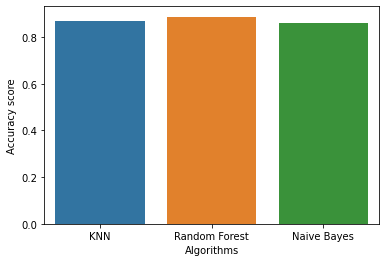

In [52]:
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(algorithms,scores)